In [1]:
# Removing warnings
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [40]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


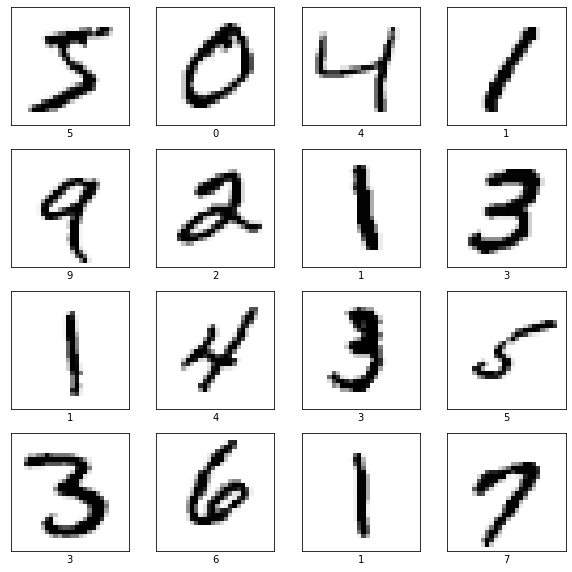

In [5]:
plt.figure(figsize = (10,10))

for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i], cmap = 'Greys')
    plt.xlabel(str(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

input_shape = (28,28,1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## conv model

In [7]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

## Compiling and fitting model

In [9]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(x_train,y_train, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 15s 253us/sample - loss: 0.2014 - acc: 0.9402
Epoch 2/10
60000/60000 [==============================] - 13s 211us/sample - loss: 0.0822 - acc: 0.9751
Epoch 3/10
60000/60000 [==============================] - 12s 208us/sample - loss: 0.0589 - acc: 0.9815
Epoch 4/10
60000/60000 [==============================] - 12s 204us/sample - loss: 0.0437 - acc: 0.9857
Epoch 5/10
60000/60000 [==============================] - 12s 195us/sample - loss: 0.0360 - acc: 0.9879
Epoch 6/10
60000/60000 [==============================] - 12s 207us/sample - loss: 0.0309 - acc: 0.9893
Epoch 7/10
60000/60000 [==============================] - 12s 202us/sample - loss: 0.0252 - acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.0223 - acc: 0.9924 - lo
Epoch 9/10
60000/60000 [==============================] - 14s 231us/sample - loss: 0.0207 - acc: 0.9926
Epoch 10/10
60000/60000 [==============================] - 

In [10]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 118us/sample - loss: 0.0659 - acc: 0.9852


[0.06591417690588619, 0.9852]

In [11]:
model.save('mnist-model-test1.h5')

Text(0.5, 0, '9')

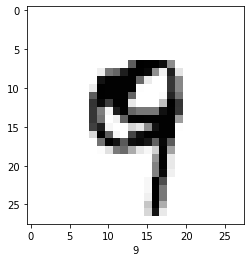

In [12]:
index = 4444
plt.imshow(x_test[index].reshape(28,28),cmap='Greys')
pred = model.predict(x_test[index].reshape(1,28,28,1))
plt.xlabel(pred.argmax())